In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
dirname = "sotsuken/"
os.makedirs(dirname, exist_ok=True)
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
import scipy.linalg as la

import quantecon as qe
from control import matlab

In [2]:
# ずっと使ってきたやつ
set_parameter = 3

# ch10
# set_parameter = 2

In [3]:
# 効用関数の設定
# LQR_util = 2で効用をマイナスに設定
# LQR_util = 2ではLQRの重み行列が正定値行列とならず破綻
LQR_util = 1

In [4]:
if set_parameter == 1:
    # Set parameters ずっと使ってきたやつ
    mu_d = 13.0
    rho = 0.05
    gan = 8.0
    c_d = 1.0
    beta_std = 0.95
    R_kinri = 1 / beta_std
    ponji = 1e-9
elif set_parameter == 2:
    # Set parameters in ch10
    mu_d = 13.594
    rho = 0.241
    gan = 500.0
    c_d = 0.2
    beta_std = 0.997
    R_kinri = 1 / beta_std
    ponji = 1e-9
elif set_parameter == 3:
    # 自由に変えていいよ
    mu_d = 13.00
    rho = 0.05
    gan = 13.0
    c_d = 1.0
    #beta_std = 0.9494764430324878
    beta_std = 0.95
    R_kinri = 1 / beta_std
    ponji = 1e-9

In [5]:
sig_arr = [-1e-9, -1e-1]
d_first = 0.0
k_first = 0.0

In [6]:
# uncertaintyあり、なし全ての期間を決定
iter_t = 1500
iter_uti= iter_t

In [7]:
np.random.seed(5)
eps = np.random.randn(iter_t)

In [8]:
ovr = 120
tapple_y = 20
y_lim = (-ovr, ovr)

In [9]:
# おまじない
%load_ext autoreload
%autoreload 2

In [10]:
# olrprobust_3はリカッチのif文を削除した
# olrprobust_2との相違点は上記があるか、ないか
from olrprobust_3_using import olrp, olrprobust, doubleo

# olrprobust_2はリカッチのif文有〼
# matlabを極力そのまま移し替えた。
# from olrprobust_2_using import olrp, olrprobust, doubleo

# olrprobust_1はgithubから
# from olrprobust_1_using import olrp,olrprobust,doubleo

In [11]:
# y=[1 d k]のやつ
QLQ_mat = np.matrix([[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ponji]])
ALQ_mat = np.matrix(
    [[1.0, 0.0, 0.0], [(1.0 - rho) * mu_d, rho, 0.0], [-gan, 1.0, R_kinri]]
)
# u=\gamma - c_tにしたため符号を反転した
BLQ_mat = np.matrix([[0.0], [0.0], [1.0]])
CLQ_mat = np.matrix([[0.0], [c_d], [0.0]])
RLQ_mat = np.matrix([[1]])
print(ALQ_mat)
F_nomis_mat, K_nomis_mat, P_nomis_mat, Pt_nomis_mat = olrprobust(
    beta_std, ALQ_mat, BLQ_mat, CLQ_mat, QLQ_mat, RLQ_mat, sig_arr[0]
)
print(f"F = {F_nomis_mat[0]}")
print(f"P = {P_nomis_mat[0]}")
print(f"A = {ALQ_mat}")


[[  1.           0.           0.        ]
 [ 12.35         0.05         0.        ]
 [-13.           1.           1.05263158]]
F = [-0.68241495  0.05249346  0.0526316 ]
P = [[ 9.31379986 -0.71644614 -0.71833153]]
A = [[  1.           0.           0.        ]
 [ 12.35         0.05         0.        ]
 [-13.           1.           1.05263158]]


In [12]:
BtLQ_mat=np.hstack([BLQ_mat,CLQ_mat])
print(BtLQ_mat)

[[0. 0.]
 [0. 1.]
 [1. 0.]]


In [13]:
Co=np.hstack([BtLQ_mat,ALQ_mat*BtLQ_mat,ALQ_mat**2*BtLQ_mat])
print(Co)

[[0.         0.         0.         0.         0.         0.        ]
 [0.         1.         0.         0.05       0.         0.0025    ]
 [1.         0.         1.05263158 1.         1.10803324 1.10263158]]


In [14]:
np.linalg.matrix_rank(Co)

2

in robustness

In [15]:
# y=[1 d k]のやつ
QLQ_mat = np.matrix([[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ponji]])
ALQ_mat = np.matrix(
    [[1.0, 0.0, 0.0], [-gan, R_kinri, 1.0], [(1.0 - rho) * mu_d, 0.0, rho]]
)
# u=\gamma - c_tにしたため符号を反転した
BLQ_mat = np.matrix([[0.0], [1.0], [0.0]])
CLQ_mat = np.matrix([[0.0], [0.0], [c_d]])
RLQ_mat = np.matrix([[1.]])
print(ALQ_mat)

[[  1.           0.           0.        ]
 [-13.           1.05263158   1.        ]
 [ 12.35         0.           0.05      ]]


In [16]:
BtLQ_mat=np.hstack([BLQ_mat,CLQ_mat])
print(BtLQ_mat)

[[0. 0.]
 [1. 0.]
 [0. 1.]]


In [17]:
Co=np.hstack([BtLQ_mat,ALQ_mat*BtLQ_mat,ALQ_mat**2*BtLQ_mat])
print(Mc)

NameError: name 'Mc' is not defined

In [ ]:
np.linalg.matrix_rank(Mc)

2

In [ ]:
BtLQ_mat=np.hstack([BLQ_mat,CLQ_mat])
Co=np.hstack([BtLQ_mat,ALQ_mat*BtLQ_mat,ALQ_mat**2*BtLQ_mat])
np.linalg.matrix_rank(Mc)

2

in quant

In [ ]:
A = np.array([[1.0, 0.0], [(1.0 - rho) * mu_d, rho]])
C = np.array([[0.0], [c_d]])

# ここでは使わない
G = np.array([[0.0, 1.0]])
G_1 = np.array([[1.0, 0.0]])
A12 = np.zeros((2, 1))
ALQ_l = np.hstack([A, A12])
ALQ_r = np.array([[-gan, 1.0, R_kinri]])
ALQ_quant = np.vstack([ALQ_l, ALQ_r])
RLQ_quant = np.array(
    [
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, ponji],
    ]
)
QLQ_quant = np.array([1.0])
BLQ_quant = np.array([0.0, 0.0, 1.0]).reshape(3, 1)
CLQ_quant = np.array([0.0, c_d, 0.0]).reshape(3, 1)
beta_LQ = beta_std

In [ ]:
lqpi = qe.LQ(QLQ_quant, RLQ_quant, ALQ_quant, BLQ_quant, C=CLQ_quant, beta=beta_LQ)
x0=[1.,0.,0.,]
P_nomis_quant,F_nomis_qunat,d=lqpi.stationary_values()
xp, up, wp = lqpi.compute_sequence(x0, ts_length=1500, random_state=5)

In [ ]:
k_nomis_qunat = xp[2, :]
d_nomis_quant = xp[1, :]

In [ ]:
c_nomis_quant = gan - up

In [ ]:
c_nomis_quant=np.ravel(c_nomis_quant)

mean of ct

In [ ]:
np.mean(c_nomis_quant)

13.486369059114873

A-BFの固有値の実部が負かどうか。負なら安定

In [ ]:
ABF_nomis = ALQ_quant - BLQ_quant @ F_nomis_qunat
print(np.linalg.eig(ABF_nomis))

(array([0.99999998, 0.05      , 1.        ]), array([[ 0.00000000e+00,  0.00000000e+00,  7.66964989e-02],
       [ 0.00000000e+00,  7.08035351e-01,  9.97054486e-01],
       [ 1.00000000e+00, -7.06176990e-01,  1.88698615e-09]]))


可安定性の判定(可安定性の十分条件が可制御性)

Aの固有値

In [ ]:
ALQ_eigenvalues, ALQ_eigenvectors = np.linalg.eig(ALQ_quant)

In [ ]:
ALQ_l, _ = ALQ_quant.shape
In = np.eye(ALQ_l)

for eig in ALQ_eigenvalues:
    Ds = np.hstack([BLQ_quant, ALQ_quant - eig * In])
    print(f"rank = {np.linalg.matrix_rank(Ds)}")

rank = 3
rank = 2
rank = 2


Pの固有値

In [ ]:
P_eigenvalues, P_eigenvectors = np.linalg.eig(P_nomis_quant)
print(P_eigenvalues)

[9.42431250e+00 1.98797650e-18 9.96488055e-10]


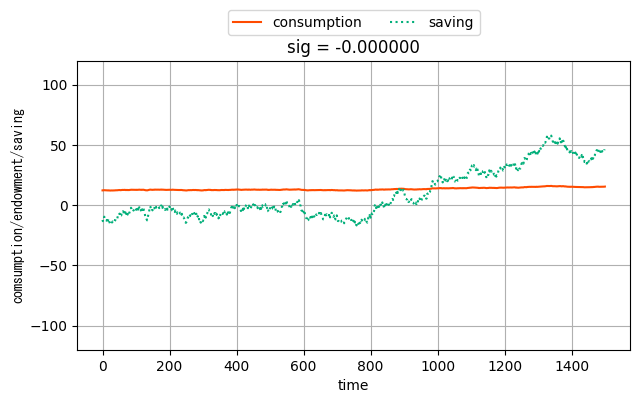

In [ ]:
iter_t-=1
plt.figure(figsize=[6.5, 4.2])
plt.title("sig = %f" % (sig_arr[0]))
plt.ylim(y_lim)
colorlist = ["#FF4B00", "#005AFF", "#03AF7A"]
# Plot consumption
plt.plot(
    np.array(range(iter_t+1)),
    c_nomis_quant[:iter_t+1],
    linestyle="-",
    label="consumption",
    color=colorlist[0],
)

# Plot endowment
#plt.plot(
#    np.array(range(iter_t)),
#    d_nomis_mat[:iter_t],
#    linestyle="--",
#    label="endowment",
#    color=colorlist[1],
#)

# Plot saving
plt.plot(
    np.array(range(iter_t)),
    k_nomis_qunat[1:iter_t+1],
    linestyle=":",
    label="saving",
    color=colorlist[2],
)

# Legend with specified arguments
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=3, prop={"size": 10})
plt.xlabel("time", fontsize=10)
plt.ylabel("comsumption/endowment/saving", fontname="MS Gothic", fontsize=10)
plt.grid()
plt.tight_layout()